In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [35]:
g = gaussian(A = np.ones(1),
             M = np.zeros(1),
             S = np.ones(1))
N = 5000
parameters = {
    'name': 'equilibrium_test',
    'num_steps': 200,
    'num_dim': 1,
    'num_particles': N,
    'beta': np.random.uniform(2,4),
    'Ddt': 0.01,
    'x0': np.ones(N) * 1.5,
    'potential': potential([g])
}

In [36]:
Xs = simulate(parameters)

In [37]:
num_steps = parameters['num_steps']
mean = np.zeros(num_steps)
var = np.zeros(num_steps)
for t in range(num_steps):
    mean[t] = np.mean(Xs[t,0,:])
    var[t] = np.var(Xs[t,0,:])

# Theory
x0 = parameters['x0'][0]
Ddt = parameters['Ddt']
beta = parameters['beta']
k = parameters['potential'].k
mean_theory = x0 * np.exp(-1*beta*Ddt*k*range(num_steps))
var_theory = 1/(beta*k) * (1-np.exp(-2*beta*Ddt*k*range(num_steps)))

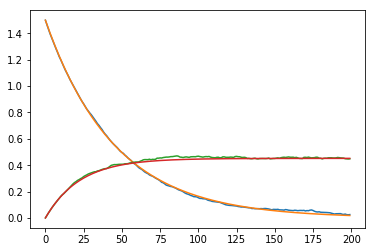

In [38]:
plt.plot(range(num_steps), mean)
plt.plot(range(num_steps), mean_theory)
plt.plot(range(num_steps), var)
plt.plot(range(num_steps), var_theory)